# IMPORT

In [6]:
# https://github.com/simonb83/ecobici

import os
import sys
import urllib.request
import pandas as pd

In [2]:
years = range(2010,2020)

months = [str(m).zfill(2) for m in range(1, 13)]

for y in years:
    for m in months:
        url = "https://www.ecobici.cdmx.gob.mx/sites/default/files/data/usages/{}-{}.csv".format(y, m)
        file_name = os.path.join("raw", "{}-{}.csv".format(y, m))

        if not os.path.exists(file_name):
            print("Retrieving {}".format(file_name))
            try:
                urllib.request.urlretrieve(url, file_name)
            except urllib.error.URLError as e:
                print(e.code, file_name)
            except urllib.error.HTTPError as e:
                print(e.args, file_name)

def convert_date(d):
    return "2016-{}-{}".format(d[3:5], d[0:2])

file_names = ['raw/2016-08.csv', 'raw/2016-09.csv', 'raw/2016-10.csv']

for f in file_names:
    df = pd.read_csv(f)

    df['Fecha_Retiro'] = df['Fecha_Retiro'].apply(convert_date)
    df['Fecha_Arribo'] = df['Fecha_Arribo'].apply(convert_date)

    df.to_csv(f, index=False)

Retrieving raw\2010-01.csv
404 raw\2010-01.csv
Retrieving raw\2010-02.csv
Retrieving raw\2010-03.csv
Retrieving raw\2010-04.csv
Retrieving raw\2010-05.csv
Retrieving raw\2010-06.csv
Retrieving raw\2010-07.csv
Retrieving raw\2010-08.csv
Retrieving raw\2010-09.csv
Retrieving raw\2010-10.csv
Retrieving raw\2010-11.csv
Retrieving raw\2010-12.csv
Retrieving raw\2011-01.csv
Retrieving raw\2011-02.csv
Retrieving raw\2011-03.csv
Retrieving raw\2011-04.csv
Retrieving raw\2011-05.csv
Retrieving raw\2011-06.csv
Retrieving raw\2011-07.csv
Retrieving raw\2011-08.csv
Retrieving raw\2011-09.csv
Retrieving raw\2011-10.csv
Retrieving raw\2011-11.csv
Retrieving raw\2011-12.csv
Retrieving raw\2012-01.csv
Retrieving raw\2012-02.csv
Retrieving raw\2012-03.csv
Retrieving raw\2012-04.csv
Retrieving raw\2012-05.csv
Retrieving raw\2012-06.csv
Retrieving raw\2012-07.csv
Retrieving raw\2012-08.csv
Retrieving raw\2012-09.csv
Retrieving raw\2012-10.csv
Retrieving raw\2012-11.csv
Retrieving raw\2012-12.csv
Retrievi

# START HERE

In [10]:
import os
import sys

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

# STATIONS

### Classify list of stations, adding our shape measurement

In [23]:
import json

with open("update_stations.json", "r") as f:
    stations = json.load(f)

df_stations = pd.DataFrame(stations)
for col in ["lat", "lon", "id"]:
    df_stations[col] = pd.to_numeric(df_stations[col])

In [24]:
import geopandas as gpd
from shapely.geometry import shape, Point

geom_colonias = gpd.read_file("colonias/CDMX/CDMX.shp")

def district_finder(row):
    point = Point(row["lon"], row["lat"])
    
    for _, row in geom_colonias.iterrows():
        polygon = shape(row["geometry"])
        
        if polygon.contains(point):
            return row["SETT_NAME"]
        
    return "NA"

In [26]:
geom_colonias

,OBJECTID,POSTALCODE,ST_NAME,MUN_NAME,SETT_NAME,SETT_TYPE,AREA,Shape_Leng,Shape_Area,geometry
0,11065,01000,DISTRITO FEDERAL,ÁLVARO OBREGÓN,SAN ANGEL,COLONIA,711515239.0,0.053887,9.466505e-05,POLYGON Z ((-99.20257000020518 19.345380000187...
1,11066,01010,DISTRITO FEDERAL,ÁLVARO OBREGÓN,LOS ALPES,COLONIA,711515239.0,0.029948,4.433100e-05,POLYGON Z ((-99.19058000036659 19.363460000278...
2,11067,01020,DISTRITO FEDERAL,ÁLVARO OBREGÓN,GUADALUPE INN,COLONIA,711515239.0,0.034212,5.763755e-05,POLYGON Z ((-99.1851499999724 19.3618699998008...
3,11068,01030,DISTRITO FEDERAL,ÁLVARO OBREGÓN,AXOTLA,COLONIA,711515239.0,0.025519,3.213660e-05,POLYGON Z ((-99.17462000001285 19.361860000239...
4,11069,01030,DISTRITO FEDERAL,ÁLVARO OBREGÓN,FLORIDA,COLONIA,711515239.0,0.044882,8.945425e-05,POLYGON Z ((-99.18276000037355 19.362370000375...
5,11070,01040,DISTRITO FEDERAL,ÁLVARO OBREGÓN,CAMPESTRE,COLONIA,711515239.0,0.031105,3.234310e-05,POLYGON Z ((-99.19812000003782 19.355460000079...
6,11071,01048,DISTRITO FEDERAL,ÁLVARO OBREGÓN,AGUILAS SECCION HORNOS,UNIDAD HABITACIONAL,711515239.0,0.008020,2.192150e-06,POLYGON Z ((-99.20643999970605 19.361539999871...
7,11072,01049,DISTRITO FEDERAL,ÁLVARO OBREGÓN,TLACOPAC,PUEBLO,711515239.0,0.025022,2.886065e-05,POLYGON Z ((-99.19370000035457 19.351540000071...
8,11073,01050,DISTRITO FEDERAL,ÁLVARO OBREGÓN,AGRICOLA,COLONIA,711515239.0,0.016484,9.084950e-06,POLYGON Z ((-99.18241000042104 19.347530000409...
9,11074,01050,DISTRITO FEDERAL,ÁLVARO OBREGÓN,GUADALUPE CHIMALISTAC,COLONIA,711515239.0,0.015355,1.445760e-05,POLYGON Z ((-99.18168999959363 19.351410000371...


In [27]:
# for index, row in df_stations.iterrows():
#     df_stations.loc[index, "Colonia"] = district_finder(row)
#     print(".", end = '')

# df_stations.to_csv("df_stations.csv")

................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [ ]:
df_stations = pd.read_csv("df_stations.csv")

In [43]:
districts = df_stations["district"].unique()
districts = np.delete(districts, "1") # Random identifier
print(districts)
colonias = df_stations["Colonia"].unique()
print(colonias)

['CUA' 'TAB' 'JUA' 'CEN' 'R-N' 'CON' 'HIP' 'H-C' 'S-R' 'DOC' 'ROM' 'ESC'
 'BUE' 'SMC' 'CHA' 'POL' 'GRA' '2' 'NAR' 'DVN' 'NAP' 'SPP' 'DVC' 'AMN'
 'ISB' 'CDD' 'SMN' 'NBU' 'EXI' 'TLA' 'LEV' 'DVS' 'INM' 'SCA' 'PON' 'REE'
 'ACT' 'ACA' 'XOC' 'GPM' nan 'MDR' 'LMV' 'LCH' 'LCI' 'IRR' 'AMG' 'CUP'
 'ANH' 'ANI' 'AME']
['CUAUHTEMOC' 'TABACALERA' 'JUAREZ' 'CENTRO' 'ROMA NORTE' 'CONDESA'
 'HIPODROMO' 'HIPODROMO DE LA CONDESA' 'SAN RAFAEL' 'DOCTORES' 'ROMA SUR'
 'CENTRO URBANO BENITO JUAREZ' 'ESCANDON' 'BUENAVISTA'
 'SAN MIGUEL CHAPULTEPEC' '1RA SECC DEL BOSQUE DE CHAPULTEPEC' 'GRANADA'
 'LOS MORALES SECC PALMAS' 'POLANCO REFORMA' 'CHAPULTEPEC MORALES'
 'LOS MORALES SECC ALAMEDA' 'POLANCO CHAPULTEPEC' 'BOSQUES DE CHAPULTEPEC'
 'PALMITAS' 'RINCON DEL BOSQUE' 'LOS MORALES' 'ANZURES' 'NUEVA ANZURES'
 'PIEDAD NARVARTE' 'DEL VALLE' 'NARVARTE PONIENTE' 'NAPOLES'
 'SAN PEDRO DE LOS PINOS' 'DEL VALLE CENTRO' 'AMPL NAPOLES'
 'INSURGENTES SAN BORJA' 'CIUDAD DE LOS DEPORTES' 'NONOALCO' 'NOCHE BUENA'
 'EXTREMADUR

C:\Users\Adam Chang\Anaconda3\envs\ecob\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
  


## Choose active stations in each month

In [30]:
for i in range(2010,2020):
    print('"%d-03.csv", "%d-09.csv", ' % (i, i), end = '')

"2010-03.csv", "2010-09.csv", "2011-03.csv", "2011-09.csv", "2012-03.csv", "2012-09.csv", "2013-03.csv", "2013-09.csv", "2014-03.csv", "2014-09.csv", "2015-03.csv", "2015-09.csv", "2016-03.csv", "2016-09.csv", "2017-03.csv", "2017-09.csv", "2018-03.csv", "2018-09.csv", "2019-03.csv", "2019-09.csv", 

In [17]:
def int_station(x):
    try:
        y = int(x)
    except:
        y = 0
    return y

In [19]:
months = ["2010-03.csv", "2010-09.csv", "2011-03.csv", "2011-09.csv",
          "2012-03.csv", "2012-09.csv", "2013-03.csv", "2013-09.csv",
          "2014-03.csv", "2014-09.csv", "2015-03.csv", "2015-09.csv",
          "2016-03.csv", "2016-09.csv", "2017-03.csv", "2017-09.csv",
          "2018-03.csv", "2018-09.csv", "2019-03.csv"]

months_dt = pd.to_datetime([x.split(".")[0] for x in months])
station_month_active = np.zeros((481, len(months)))

for i in range(len(months)):
    print(months[i])
    df = pd.read_csv(os.path.join("raw", months[i]))
    
    this_retiro = pd.to_numeric(df["Ciclo_Estacion_Retiro"], errors = "ignore").apply(int_station)
    this_arribo = pd.to_numeric(df["Ciclo_Estacion_Arribo"], errors = "ignore").apply(int_station)
    this_stations = pd.concat([this_retiro, this_arribo]).unique()
    this_stations = [x for x in this_stations if x > 0 and x < 481]
    
    for j in this_stations:
        station_month_active[j,i] = 1

2010-03.csv
2010-09.csv
2011-03.csv
2011-09.csv
2012-03.csv
2012-09.csv
2013-03.csv
2013-09.csv
2014-03.csv
2014-09.csv
2015-03.csv
2015-09.csv
2016-03.csv
2016-09.csv
2017-03.csv
2017-09.csv
2018-03.csv
2018-09.csv
2019-03.csv


### Count by district, colonia

In [31]:
lt_trend_dists = {}
lt_trend_cols = {}

for dist in districts:
    stations_id = list(df_stations[df_stations["district"] == dist]["id"])
    lt_trend_dists[dist] = np.sum(station_month_active[stations_id], axis = 0)
    
for col in colonias:
    stations_id = list(df_stations[df_stations["Colonia"] == col]["id"])
    lt_trend_cols[col] = np.sum(station_month_active[stations_id], axis = 0)

### Plot many/few-bike districts and colonias

<Figure size 432x288 with 0 Axes>

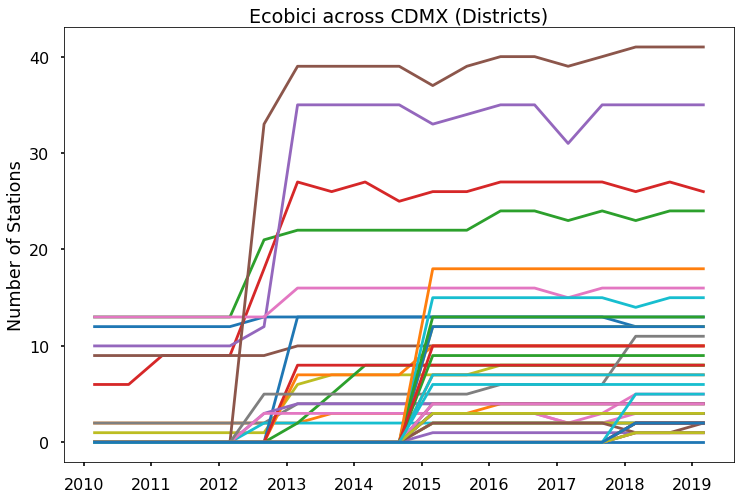

In [51]:
plt.clf()
plt.figure(figsize = (12, 8))
plt.title("Ecobici across CDMX (Districts)")
plt.ylabel("Number of Stations")

for p in districts:
    plt.plot(months_dt, lt_trend_dists[p])

plt.savefig("plots/lt_trends/plot_dist_nolegend.png")

<Figure size 432x288 with 0 Axes>

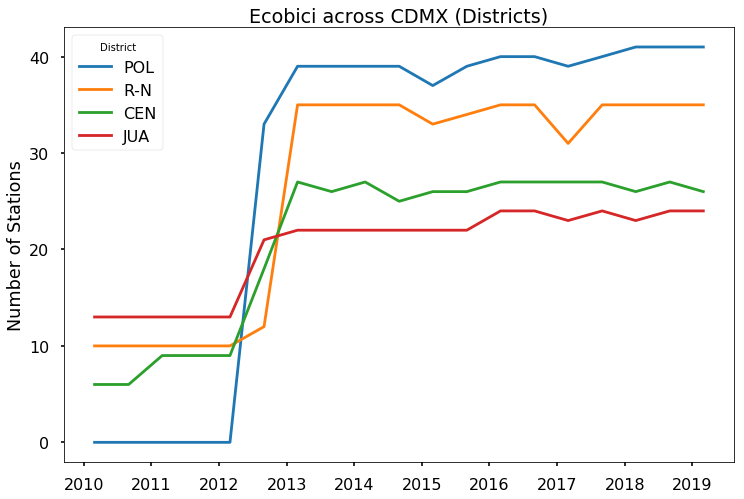

In [86]:
plotL_dist = ["POL", "R-N", "CEN", "JUA"]

plt.clf()
plt.figure(figsize = (12, 8))
plt.title("Ecobici across CDMX (Districts)")
plt.ylabel("Number of Stations")

for p in plotL_dist:
    plt.plot(months_dt, lt_trend_dists[p], label = p)

plt.legend(title = "District")
plt.savefig("plots/lt_trends/plotL_dist.png")

<Figure size 432x288 with 0 Axes>

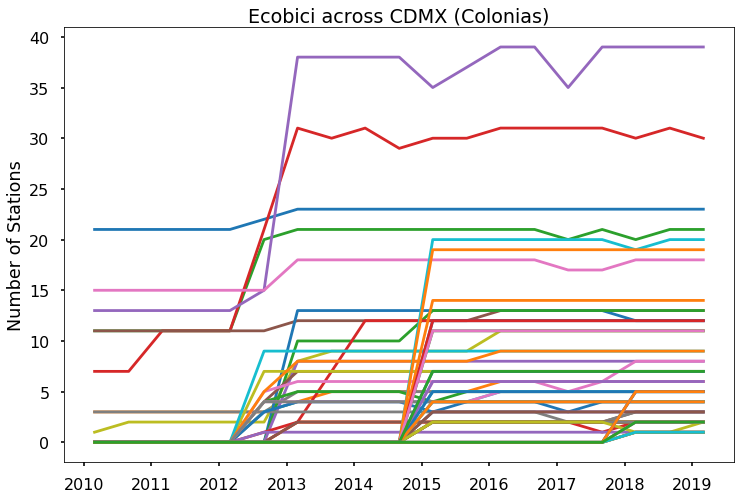

In [57]:
plt.clf()
plt.figure(figsize = (12, 8))
plt.title("Ecobici across CDMX (Colonias)")
plt.ylabel("Number of Stations")

for p in colonias:
    plt.plot(months_dt, lt_trend_cols[p])
    
plt.savefig("plots/lt_trends/plot_col_nolegend.png")

<Figure size 432x288 with 0 Axes>

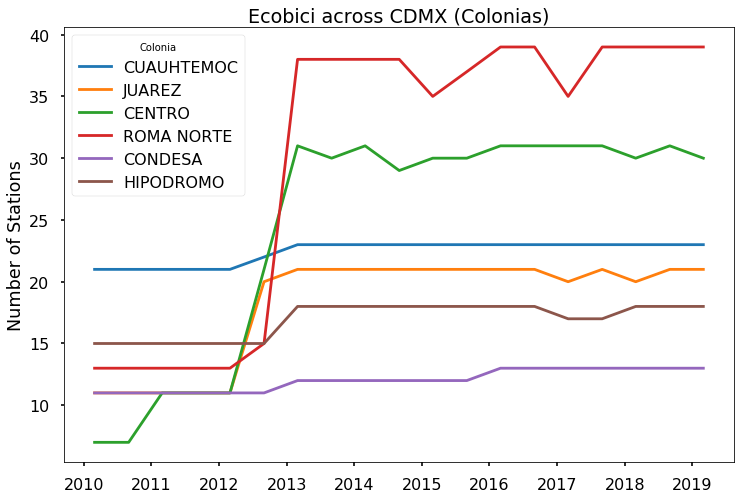

In [58]:
plotL_col = ["CUAUHTEMOC", "JUAREZ", "CENTRO", "ROMA NORTE", "CONDESA", "HIPODROMO"]

plt.clf()
plt.figure(figsize = (12, 8))
plt.title("Ecobici across CDMX (Colonias)")
plt.ylabel("Number of Stations")

for p in plotL_col:
    plt.plot(months_dt, lt_trend_cols[p], label = p)

plt.legend(title = "Colonia")
plt.savefig("plots/lt_trends/plotL_col.png")

## Normalize and re-plot

In [98]:
pop_dists = {'CUA': 11399, # neighborhood of the borough (nice)
            'TAB': 3267, # (mid)
            'JUA': 10184, # (mid)
            'CEN': 61229, # (mid)
            'R-N': 27770, # (nice)
            'CON': 8453, # (nice)
            'HIP': 13572, # (nice)
            'H-C': 3204, # (nice)
            'S-R': 19684, # (mid)
            'DOC': 44703, # (low)
            'ROM': 17435, # Roma Sur, apparently # (nice)
             # Drop ESC, Escandon # (mid)
            'BUE': 15605, # Buenavista # (low)
             'SMC': 11850, # San Miguel Chapul # (mid)
             # Drop CHA, it's a park
             'POL': 27322, # (nice!)
             'GRA': 76000, # Granada/Nuevo Polanco (nice)
            '2': 11300, # Anzures (nice)
             # Drop NAR, # Narvarte (mid)
             # Drop DVN # (mid) de valle norte
             'NAP': 12106, # Napoles (mid)
             # Drop SPP, # San Pedro de los Pinos (wealthy)
             # Drop DVC, # Valle Centro (mid-scale)
             # Drop AMN # Napoles (mid)
             # Drop ISB # (mid)
             'CDD': 4100, # (non-residential) (mid)
             'SMN': 27843 # (mid)
             # Drop NBU (ISB, mid)
             # Drop EXI, mid
             # Drop TLA, mid
             # Drop LEV, mid (valle)
             # DVS, valle sur (mid)
             # INM, mid Mixcoac
             # SCA, mid
             # PON, REE mid
             # ACT< mid
             # Acacias, mid
             # XOC, mid
             # MDR, nice Lomas
             # LMV, LCH, LCI nice
             # IRR nice
             # AMG nice
             # CUP mid
            }
# pop_cols = {'CUAUHTEMOC': , }

pop_cols = {'CUAUHTEMOC': 11399, 'TABACALERA': 3267, 'JUAREZ': 10184, 'CENTRO': 61229, 'ROMA NORTE': 27770, 'CONDESA': 8453,
           'HIPODROMO': 13572, 'HIPODROMO DE LA CONDESA': 3204, 'SAN RAFAEL': 19684, 'DOCTORES': 44703, 'ROMA SUR': 17435,
           'BUENAVISTA': 15605, 'SAN MIGUEL CHAPULTEPEC': 11850, 'GRANADA': 76000, 'ANZURES': 11300, 'LOMAS DE CHAPULTEPEC': 20400}

lt_trend_norm_dists = {}
lt_trend_norm_cols = {}

for dist in list(set(pop_dists) & set(lt_trend_dists)):
    lt_trend_norm_dists[dist] = lt_trend_dists[dist] / pop_dists[dist]
    
for col in list(set(pop_cols) & set(lt_trend_cols)):
    lt_trend_norm_cols[col] = lt_trend_cols[col] / pop_cols[col]

### Plot many/few-bike districts and colonias

<Figure size 432x288 with 0 Axes>

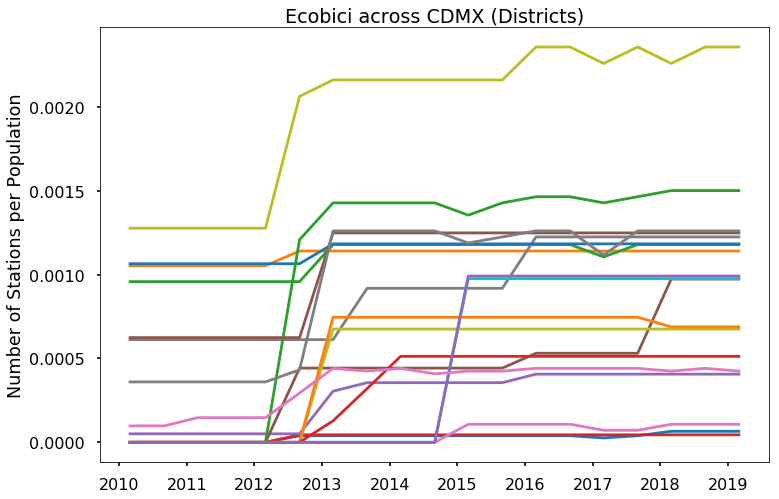

In [90]:
plt.clf()
plt.figure(figsize = (12, 8))
plt.title("Ecobici across CDMX (Districts)")
plt.ylabel("Number of Stations per Population")

for p in lt_trend_norm_dists:
    plt.plot(months_dt, lt_trend_norm_dists[p])

plt.savefig("plots/lt_trends/plotNORM_dist_nolegend.png")

<Figure size 432x288 with 0 Axes>

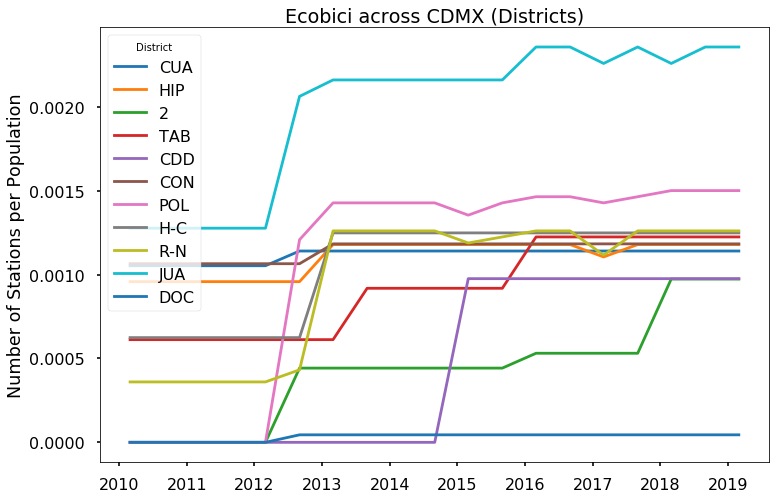

In [91]:
plotL_dist_norm = ["CUA", "HIP", "2", "TAB", "CDD", "CON", "POL", "H-C", "R-N", "JUA", "DOC"]

plt.clf()
plt.figure(figsize = (12, 8))
plt.title("Ecobici across CDMX (Districts)")
plt.ylabel("Number of Stations per Population")

for p in plotL_dist_norm:
    plt.plot(months_dt, lt_trend_norm_dists[p], label = p)

plt.legend(title = "District")
plt.savefig("plots/lt_trends/plotNORM_L_dist.png")

<Figure size 432x288 with 0 Axes>

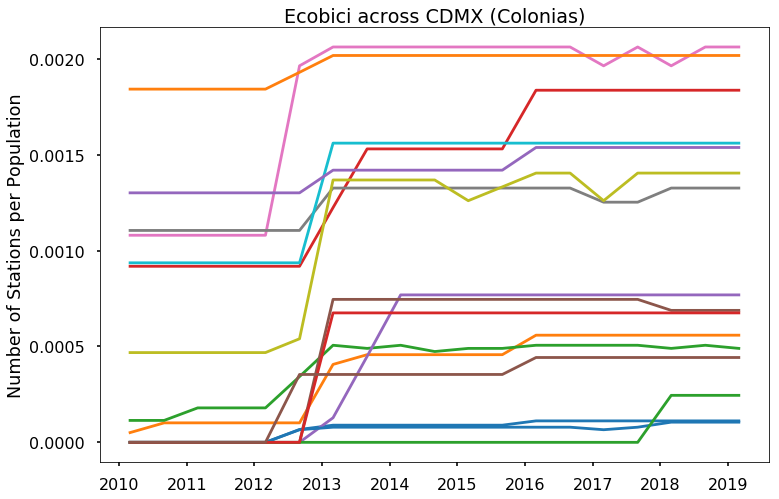

In [102]:
plt.clf()
plt.figure(figsize = (12, 8))
plt.title("Ecobici across CDMX (Colonias)")
plt.ylabel("Number of Stations per Population")

for p in lt_trend_norm_cols:
    plt.plot(months_dt, lt_trend_norm_cols[p])

plt.savefig("plots/lt_trends/plotNORM_col_nolegend.png")

<Figure size 432x288 with 0 Axes>

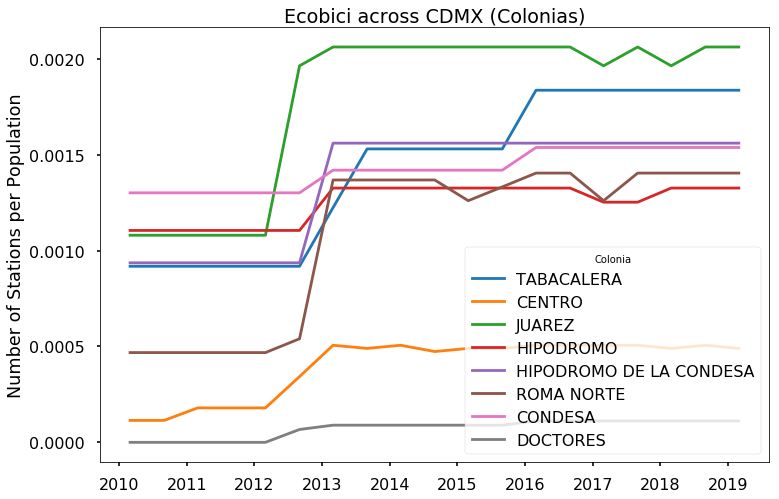

In [109]:
plotL_col_norm = ["TABACALERA", "CENTRO", "JUAREZ", "HIPODROMO", "HIPODROMO DE LA CONDESA", "ROMA NORTE", "CONDESA", "DOCTORES"]

plt.clf()
plt.figure(figsize = (12, 8))
plt.title("Ecobici across CDMX (Colonias)")
plt.ylabel("Number of Stations per Population")

for p in plotL_col_norm:
    plt.plot(months_dt, lt_trend_norm_cols[p], label = p)

plt.legend(title = "Colonia")
plt.savefig("plots/lt_trends/plotNORM_L_col.png")

## Districts/colonias SES

In [105]:
high_inc_dists = ["CUA", "R-N", "CON", "HIP", "H-C", "ROM", "POL", "GRA", "2"]
low_inc_dists = ["DOC", "BUE"]

high_inc_cols = ["CUAUHTEMOC", "ROMA NORTE", "CONDESA", "HIPODROMO", "HIPODROMO DE LA CONDESA", "ROMA SUR", "GRANADA", "ANZURES", "LOMAS DE CHAPULTEPEC"]
low_inc_cols = ["DOCTORES", "BUENAVISTA"]

In [106]:
lt_trend_norm_dists_SES = {}
lt_trend_norm_cols_SES = {}

tot_stations = np.zeros(len(months))
tot_pop = 0

for dist in high_inc_dists:
    tot_pop += pop_dists[dist]
    tot_stations += lt_trend_dists[dist]
lt_trend_norm_dists_SES["high"] = tot_stations / tot_pop

tot_stations = np.zeros(len(months))
tot_pop = 0

for dist in low_inc_dists:
    tot_pop += pop_dists[dist]
    tot_stations += lt_trend_dists[dist]
lt_trend_norm_dists_SES["low"] = tot_stations / tot_pop

tot_stations = np.zeros(len(months))
tot_pop = 0

for col in high_inc_cols:
    tot_pop += pop_cols[col]
    tot_stations += lt_trend_cols[col]
lt_trend_norm_cols_SES["high"] = tot_stations / tot_pop

tot_stations = np.zeros(len(months))
tot_pop = 0

for col in low_inc_cols:
    tot_pop += pop_cols[col]
    tot_stations += lt_trend_cols[col]
lt_trend_norm_cols_SES["low"] = tot_stations / tot_pop

<Figure size 432x288 with 0 Axes>

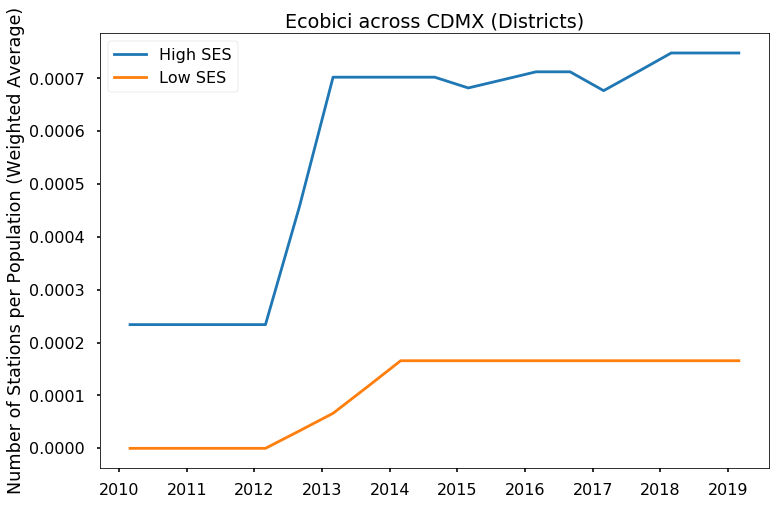

In [110]:
plt.clf()
plt.figure(figsize = (12, 8))
plt.title("Ecobici across CDMX (Districts)")
plt.ylabel("Number of Stations per Population (Weighted Average)")

plt.plot(months_dt, lt_trend_norm_dists_SES["high"], label = "High SES")
plt.plot(months_dt, lt_trend_norm_dists_SES["low"], label = "Low SES")

plt.legend()
plt.savefig("plots/lt_trends/plotNORM_SES_dist.png")

<Figure size 432x288 with 0 Axes>

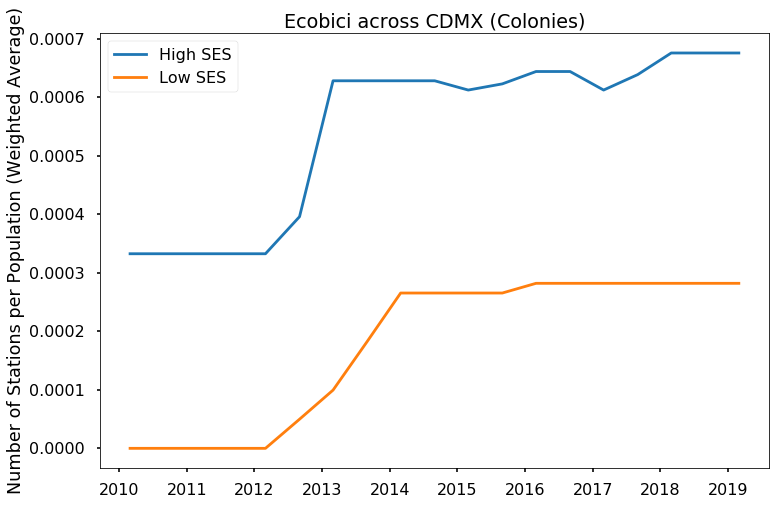

In [108]:
plt.clf()
plt.figure(figsize = (12, 8))
plt.title("Ecobici across CDMX (Colonias)")
plt.ylabel("Number of Stations per Population (Weighted Average)")

plt.plot(months_dt, lt_trend_norm_cols_SES["high"], label = "High SES")
plt.plot(months_dt, lt_trend_norm_cols_SES["low"], label = "Low SES")

plt.legend()
plt.savefig("plots/lt_trends/plotNORM_SES_col.png")

# Slots instead of stations

In [125]:
station_month_active_slot = np.zeros(station_month_active.shape)

for i in range(1, len(station_month_active)):
    station_month_active_slot[i] = int(df_stations[df_stations["id"] == i]["slots"]) * station_month_active[i]

### Count by district, colonia

In [127]:
lt_trend_dists_slot = {}
lt_trend_cols_slot = {}

for dist in districts:
    stations_id = list(df_stations[df_stations["district"] == dist]["id"])
    lt_trend_dists_slot[dist] = np.sum(station_month_active_slot[stations_id], axis = 0)
    
for col in colonias:
    stations_id = list(df_stations[df_stations["Colonia"] == col]["id"])
    lt_trend_cols_slot[col] = np.sum(station_month_active_slot[stations_id], axis = 0)

### Plot many/few-bike districts and colonias

<Figure size 432x288 with 0 Axes>

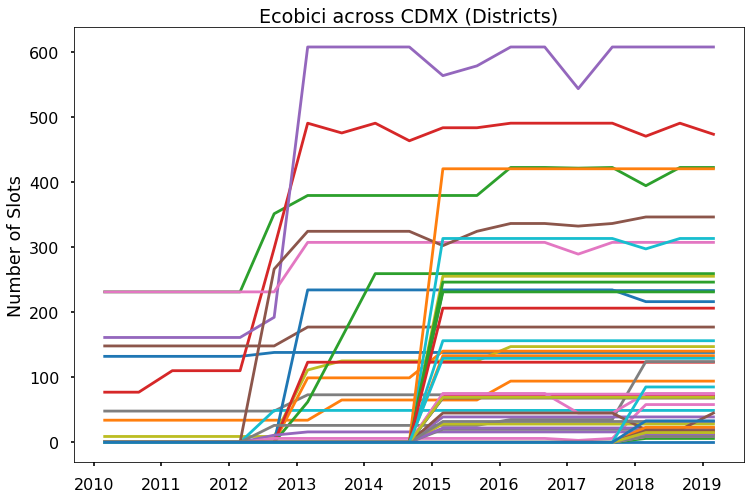

In [131]:
plt.clf()
plt.figure(figsize = (12, 8))
plt.title("Ecobici across CDMX (Districts)")
plt.ylabel("Number of Slots")

for p in districts:
    plt.plot(months_dt, lt_trend_dists_slot[p])

plt.savefig("plots/lt_trends/plot_dist_nolegend_slot.png")

<Figure size 432x288 with 0 Axes>

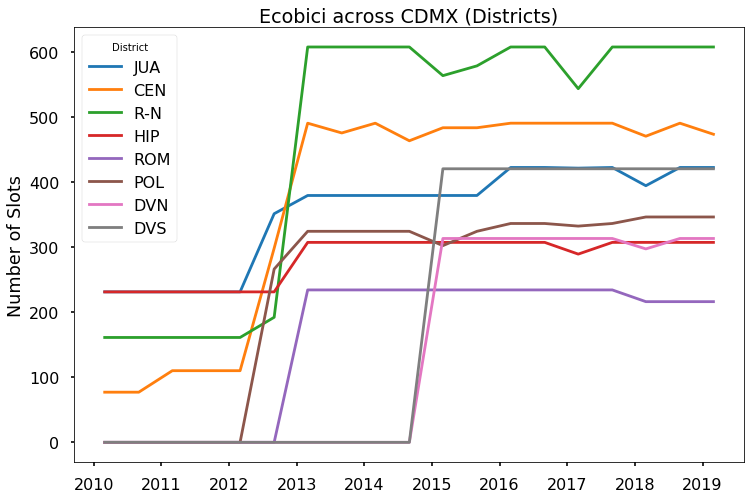

In [132]:
plotL_dist = ["JUA", "CEN", "R-N", "HIP", "ROM", "POL", "DVN", "DVS"]

plt.clf()
plt.figure(figsize = (12, 8))
plt.title("Ecobici across CDMX (Districts)")
plt.ylabel("Number of Slots")

for p in plotL_dist:
    plt.plot(months_dt, lt_trend_dists_slot[p], label = p)

plt.legend(title = "District")
plt.savefig("plots/lt_trends/plotL_dist_slot.png")

<Figure size 432x288 with 0 Axes>

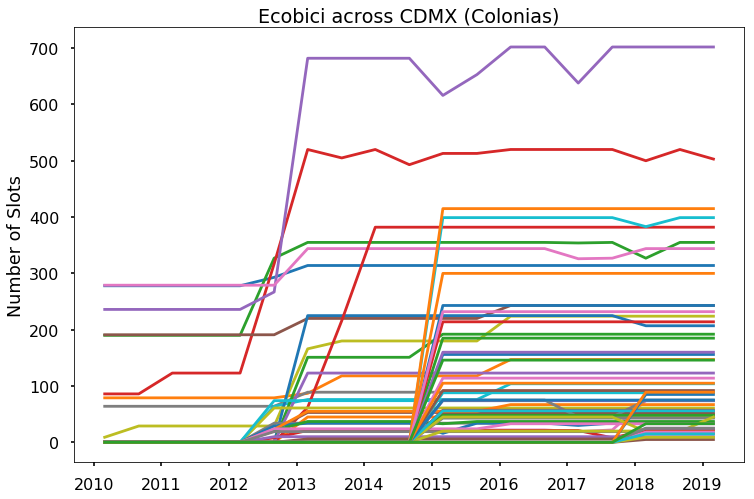

In [135]:
plt.clf()
plt.figure(figsize = (12, 8))
plt.title("Ecobici across CDMX (Colonias)")
plt.ylabel("Number of Slots")

for p in colonias:
    plt.plot(months_dt, lt_trend_cols_slot[p])
    
plt.savefig("plots/lt_trends/plot_col_nolegend_slot.png")

<Figure size 432x288 with 0 Axes>

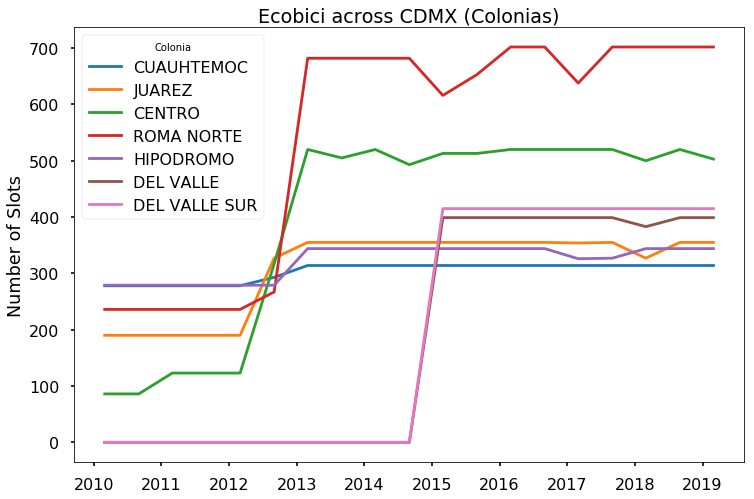

In [136]:
plotL_col = ["CUAUHTEMOC", "JUAREZ", "CENTRO", "ROMA NORTE", "HIPODROMO", "DEL VALLE", "DEL VALLE SUR"]

plt.clf()
plt.figure(figsize = (12, 8))
plt.title("Ecobici across CDMX (Colonias)")
plt.ylabel("Number of Slots")

for p in plotL_col:
    plt.plot(months_dt, lt_trend_cols_slot[p], label = p)

plt.legend(title = "Colonia")
plt.savefig("plots/lt_trends/plotL_col_slot.png")

## Normalize and re-plot

In [137]:
lt_trend_norm_dists_slot = {}
lt_trend_norm_cols_slot = {}

for dist in list(set(pop_dists) & set(lt_trend_dists)):
    lt_trend_norm_dists_slot[dist] = lt_trend_dists_slot[dist] / pop_dists[dist]
    
for col in list(set(pop_cols) & set(lt_trend_cols)):
    lt_trend_norm_cols_slot[col] = lt_trend_cols_slot[col] / pop_cols[col]

### Plot many/few-bike districts and colonias

<Figure size 432x288 with 0 Axes>

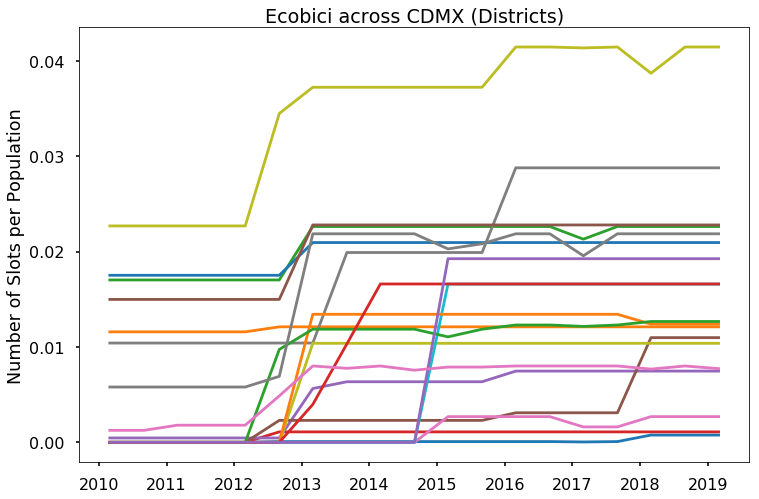

In [138]:
plt.clf()
plt.figure(figsize = (12, 8))
plt.title("Ecobici across CDMX (Districts)")
plt.ylabel("Number of Slots per Population")

for p in lt_trend_norm_dists_slot:
    plt.plot(months_dt, lt_trend_norm_dists_slot[p])

plt.savefig("plots/lt_trends/plotNORM_dist_nolegend_slot.png")

<Figure size 432x288 with 0 Axes>

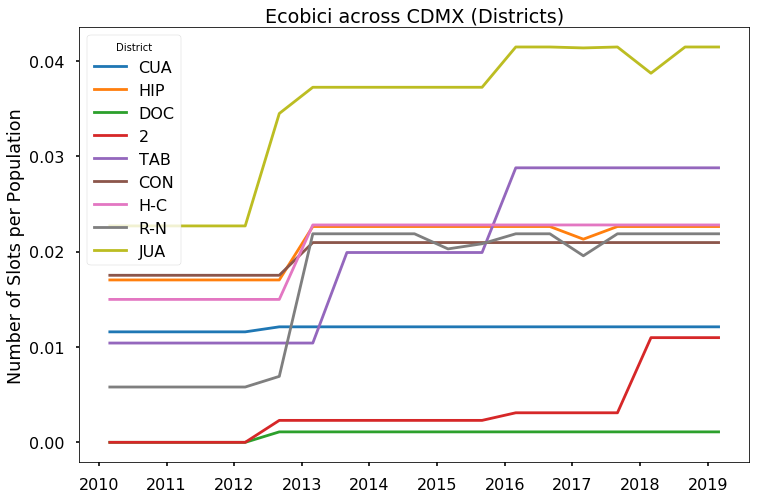

In [141]:
plotL_dist_norm = ["CUA", "HIP", "DOC", "2", "TAB", "CON", "H-C", "R-N", "JUA"]

plt.clf()
plt.figure(figsize = (12, 8))
plt.title("Ecobici across CDMX (Districts)")
plt.ylabel("Number of Slots per Population")

for p in plotL_dist_norm:
    plt.plot(months_dt, lt_trend_norm_dists_slot[p], label = p)

plt.legend(title = "District")
plt.savefig("plots/lt_trends/plotNORM_L_dist_slot.png")

<Figure size 432x288 with 0 Axes>

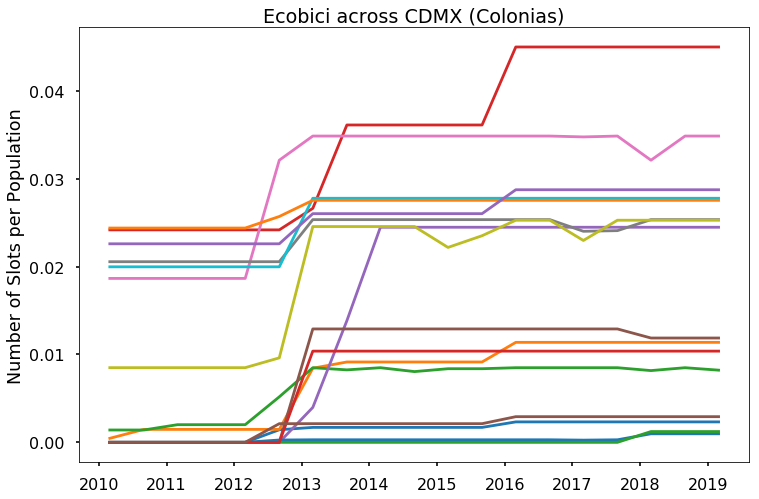

In [145]:
plt.clf()
plt.figure(figsize = (12, 8))
plt.title("Ecobici across CDMX (Colonias)")
plt.ylabel("Number of Slots per Population")

for p in lt_trend_norm_cols:
    plt.plot(months_dt, lt_trend_norm_cols_slot[p])

plt.savefig("plots/lt_trends/plotNORM_col_nolegend_slot.png")

<Figure size 432x288 with 0 Axes>

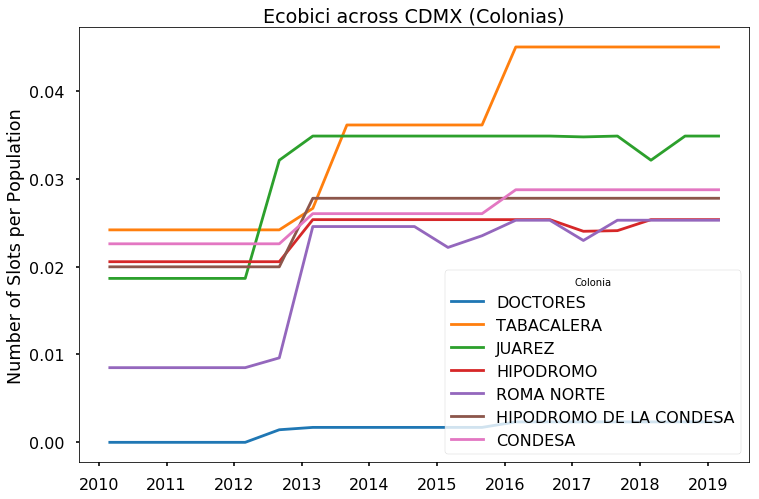

In [146]:
plotL_col_norm = ["DOCTORES", "TABACALERA", "JUAREZ", "HIPODROMO", "ROMA NORTE", "HIPODROMO DE LA CONDESA", "CONDESA"]

plt.clf()
plt.figure(figsize = (12, 8))
plt.title("Ecobici across CDMX (Colonias)")
plt.ylabel("Number of Slots per Population")

for p in plotL_col_norm:
    plt.plot(months_dt, lt_trend_norm_cols_slot[p], label = p)

plt.legend(title = "Colonia")
plt.savefig("plots/lt_trends/plotNORM_L_col_slot.png")

## Districts/colonias SES

In [147]:
lt_trend_norm_dists_SES_slot = {}
lt_trend_norm_cols_SES_slot = {}

tot_stations = np.zeros(len(months))
tot_pop = 0

for dist in high_inc_dists:
    tot_pop += pop_dists[dist]
    tot_stations += lt_trend_dists_slot[dist]
lt_trend_norm_dists_SES_slot["high"] = tot_stations / tot_pop

tot_stations = np.zeros(len(months))
tot_pop = 0

for dist in low_inc_dists:
    tot_pop += pop_dists[dist]
    tot_stations += lt_trend_dists_slot[dist]
lt_trend_norm_dists_SES_slot["low"] = tot_stations / tot_pop

tot_stations = np.zeros(len(months))
tot_pop = 0

for col in high_inc_cols:
    tot_pop += pop_cols[col]
    tot_stations += lt_trend_cols_slot[col]
lt_trend_norm_cols_SES_slot["high"] = tot_stations / tot_pop

tot_stations = np.zeros(len(months))
tot_pop = 0

for col in low_inc_cols:
    tot_pop += pop_cols[col]
    tot_stations += lt_trend_cols_slot[col]
lt_trend_norm_cols_SES_slot["low"] = tot_stations / tot_pop

<Figure size 432x288 with 0 Axes>

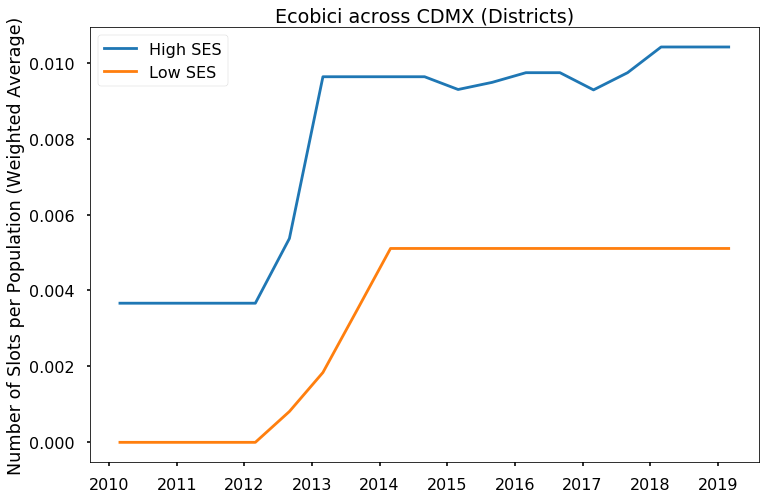

In [149]:
plt.clf()
plt.figure(figsize = (12, 8))
plt.title("Ecobici across CDMX (Districts)")
plt.ylabel("Number of Slots per Population (Weighted Average)")

plt.plot(months_dt, lt_trend_norm_dists_SES_slot["high"], label = "High SES")
plt.plot(months_dt, lt_trend_norm_dists_SES_slot["low"], label = "Low SES")

plt.legend()
plt.savefig("plots/lt_trends/plotNORM_SES_dist_slot.png")

<Figure size 432x288 with 0 Axes>

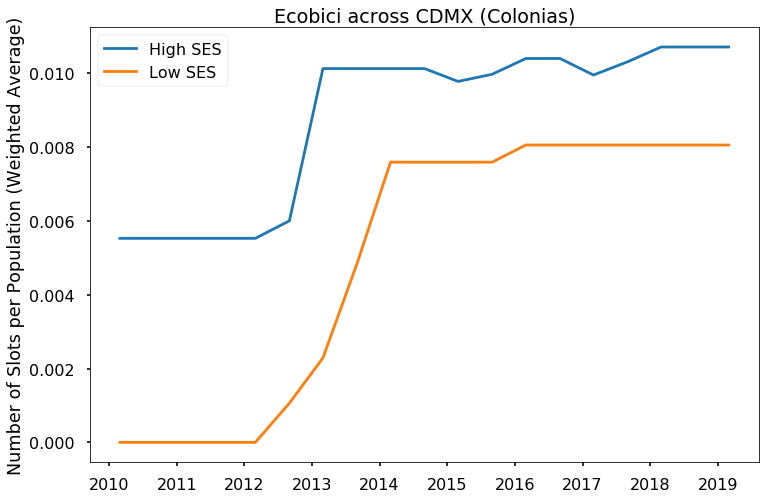

In [150]:
plt.clf()
plt.figure(figsize = (12, 8))
plt.title("Ecobici across CDMX (Colonias)")
plt.ylabel("Number of Slots per Population (Weighted Average)")

plt.plot(months_dt, lt_trend_norm_cols_SES_slot["high"], label = "High SES")
plt.plot(months_dt, lt_trend_norm_cols_SES_slot["low"], label = "Low SES")

plt.legend()
plt.savefig("plots/lt_trends/plotNORM_SES_col_slot.png")

# Ride data

In [152]:
df_recent = pd.read_csv("raw/2019-03.csv")

In [153]:
print(df_recent.head())
print(df_recent.shape)

  Genero_Usuario  Edad_Usuario   Bici  Ciclo_Estacion_Retiro Fecha_Retiro  \
0              M            34   8861                    143   01/03/2019   
1              F            33   2601                     51   01/03/2019   
2              M            25   8257                    340   01/03/2019   
3              M            32  15007                    139   01/03/2019   
4              F            22   7601                     81   01/03/2019   

  Hora_Retiro Ciclo_Estacion_Arribo Fecha_Arribo Hora_Arribo Unnamed: 9  
0    00:00:54                    68   01/03/2019    00:13:55        NaN  
1    00:01:01                    53   01/03/2019    00:07:16        NaN  
2    00:01:26                   324   01/03/2019    00:09:26        NaN  
3    00:01:42                   155   01/03/2019    00:06:20        NaN  
4    00:01:50                    75   01/03/2019    00:06:22        NaN  
(752299, 10)


### ID lists of high/low SES stations

In [158]:
df_stations["High SES"] = (df_stations["district"].apply(lambda x: x in high_inc_dists) | df_stations["Colonia"].apply(lambda x: x in high_inc_cols))

In [160]:
df_stations["Low SES"] = (df_stations["district"].apply(lambda x: x in low_inc_dists) | df_stations["Colonia"].apply(lambda x: x in low_inc_cols))

In [164]:
id_high_ses = list(df_stations[df_stations["High SES"]]["id"])
id_low_ses = list(df_stations[df_stations["Low SES"]]["id"])

## Preprocess

In [154]:
weekends = ["02/03/2019", "03/03/2019", "09/03/2019",
            "10/03/2019", "16/03/2019", "17/03/2019", "23/03/2019", "24/03/2019", 
           "30/03/2019", "31/03/2019"]

In [155]:
df_recent["Weekend"] = df_recent["Fecha_Retiro"].apply(lambda x: x in weekends)

In [156]:
print(df_recent[df_recent["Weekend"]].head())

      Genero_Usuario  Edad_Usuario   Bici  Ciclo_Estacion_Retiro Fecha_Retiro  \
29899              M            21   8513                     32   02/03/2019   
29900              F            30   8108                    436   02/03/2019   
29901              M            26   9687                    246   02/03/2019   
29902              M            28  11857                     34   02/03/2019   
29903              M            47  12396                     31   02/03/2019   

      Hora_Retiro Ciclo_Estacion_Arribo Fecha_Arribo Hora_Arribo Unnamed: 9  \
29899    00:01:04                    35   02/03/2019    00:05:26        NaN   
29900    00:01:09                   392   02/03/2019    00:07:03        NaN   
29901    00:01:54                   211   02/03/2019    00:12:51        NaN   
29902    00:01:57                   331   02/03/2019    00:34:23        NaN   
29903    00:01:57                   119   02/03/2019    00:07:33        NaN   

       Weekend  
29899     True  
2990

In [174]:
df_recent["Retiro_LowSES"] = df_recent["Ciclo_Estacion_Retiro"].apply(lambda x: x in id_low_ses)
df_recent["Arribo_LowSES"] = df_recent["Ciclo_Estacion_Arribo"].apply(lambda x: x in id_low_ses)
df_recent["LowSES"] = df_recent["Retiro_LowSES"] & df_recent["Arribo_LowSES"]

df_recent["Retiro_HighSES"] = df_recent["Ciclo_Estacion_Retiro"].apply(lambda x: x in id_high_ses)
df_recent["Arribo_HighSES"] = df_recent["Ciclo_Estacion_Arribo"].apply(lambda x: x in id_high_ses)
df_recent["HighSES"] = df_recent["Retiro_HighSES"] & df_recent["Arribo_HighSES"]

In [176]:
print(df_recent[df_recent["LowSES"]].shape)
print(df_recent[df_recent["HighSES"]].shape)

(1971, 17)
(217129, 17)


In [177]:
print(1971/len(df_recent))
print(217129/len(df_recent))

0.0026199689219313068
0.28862061494166547


## Age

<Figure size 432x288 with 0 Axes>

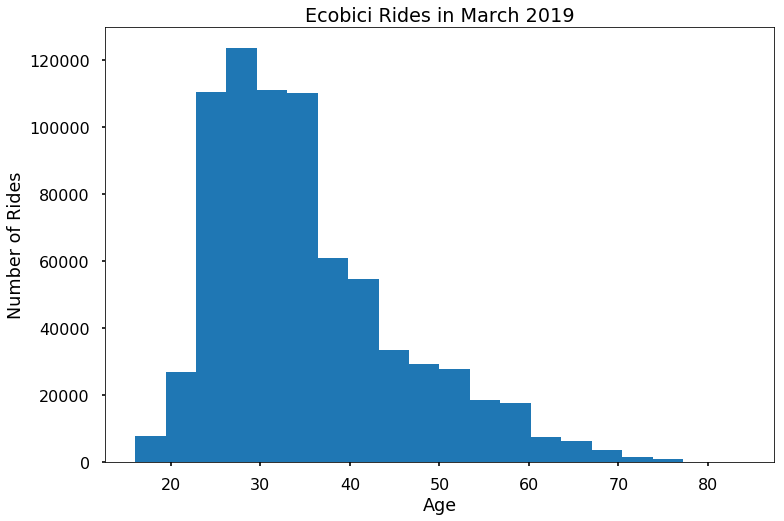

In [9]:
plt.clf()
plt.figure(figsize = (12,8))
plt.hist(df_recent["Edad_Usuario"], bins = 20)
plt.title("Ecobici Rides in March 2019")
plt.xlabel("Age")
plt.ylabel("Number of Rides")
plt.savefig("plots/age.png")

<Figure size 432x288 with 0 Axes>

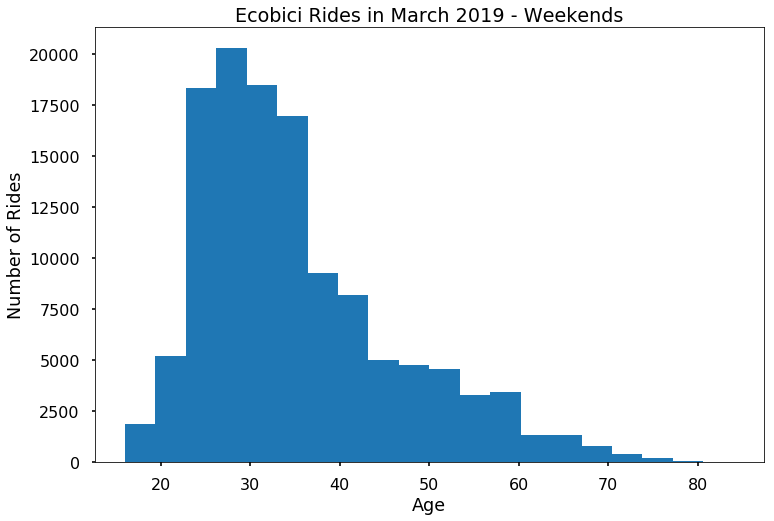

In [10]:
plt.clf()
plt.figure(figsize = (12,8))
plt.hist(df_recent[df_recent["Weekend"]]["Edad_Usuario"], bins = 20)
plt.title("Ecobici Rides in March 2019 - Weekends")
plt.xlabel("Age")
plt.ylabel("Number of Rides")
plt.savefig("plots/age_weekend.png")

<Figure size 432x288 with 0 Axes>

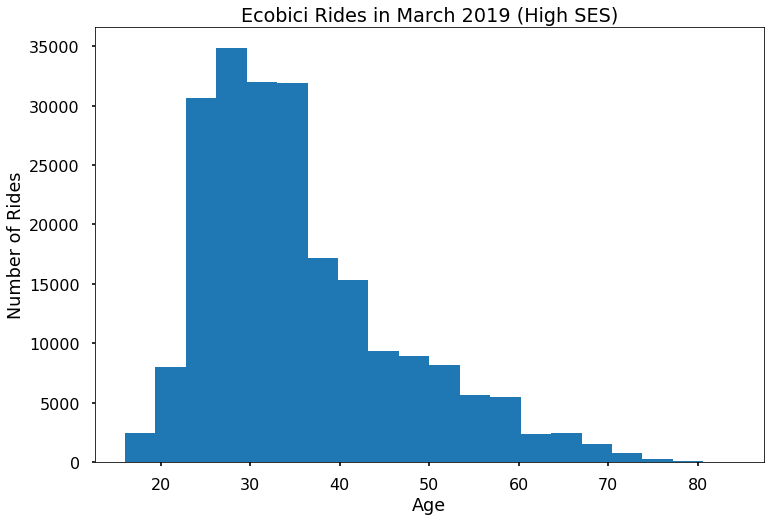

In [183]:
plt.clf()
plt.figure(figsize = (12,8))
plt.hist(df_recent[df_recent["HighSES"]]["Edad_Usuario"], bins = 20)
plt.title("Ecobici Rides in March 2019 (High SES)")
plt.xlabel("Age")
plt.ylabel("Number of Rides")
plt.savefig("plots/age_SES.png")

C:\Users\Adam Chang\Anaconda3\envs\ecob\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 432x288 with 0 Axes>

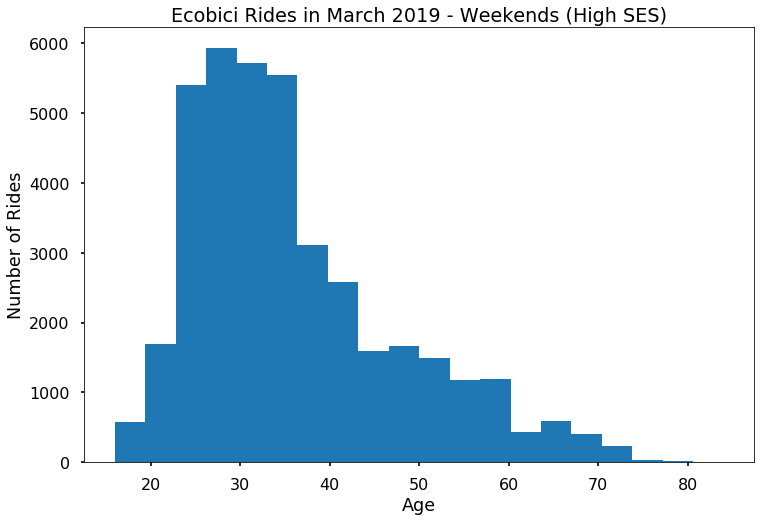

In [184]:
plt.clf()
plt.figure(figsize = (12,8))
plt.hist(df_recent[df_recent["HighSES"]][df_recent["Weekend"]]["Edad_Usuario"], bins = 20)
plt.title("Ecobici Rides in March 2019 - Weekends (High SES)")
plt.xlabel("Age")
plt.ylabel("Number of Rides")
plt.savefig("plots/age_weekend_SES.png")

<Figure size 432x288 with 0 Axes>

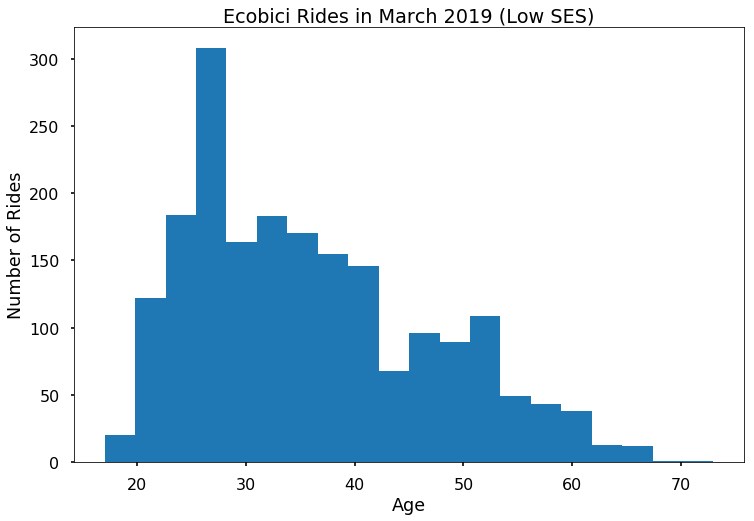

In [186]:
plt.clf()
plt.figure(figsize = (12,8))
plt.hist(df_recent[df_recent["LowSES"]]["Edad_Usuario"], bins = 20)
plt.title("Ecobici Rides in March 2019 (Low SES)")
plt.xlabel("Age")
plt.ylabel("Number of Rides")
plt.savefig("plots/age_lowSES.png")

C:\Users\Adam Chang\Anaconda3\envs\ecob\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 432x288 with 0 Axes>

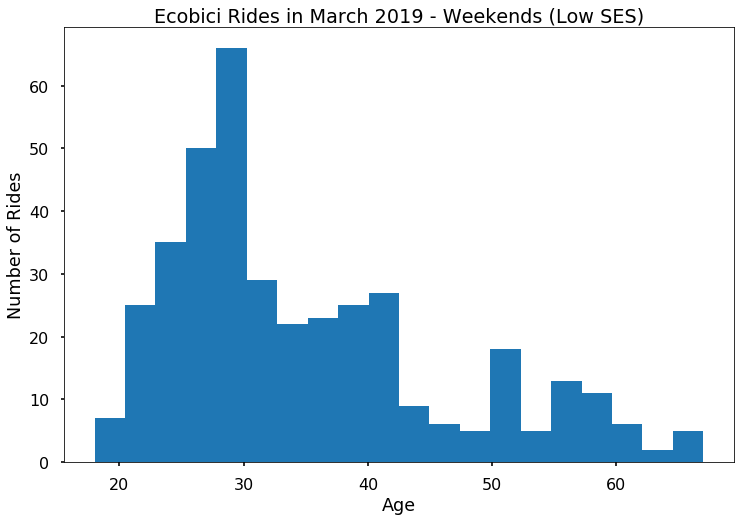

In [185]:
plt.clf()
plt.figure(figsize = (12,8))
plt.hist(df_recent[df_recent["LowSES"]][df_recent["Weekend"]]["Edad_Usuario"], bins = 20)
plt.title("Ecobici Rides in March 2019 - Weekends (Low SES)")
plt.xlabel("Age")
plt.ylabel("Number of Rides")
plt.savefig("plots/age_weekend_lowSES.png")

## Gender 

In [36]:
print(df_recent.shape)
print(df_recent[df_recent["Genero_Usuario"] == "M"].shape)
print(df_recent[df_recent["Genero_Usuario"] == "F"].shape)

(752299, 11)
(560305, 11)
(191994, 11)


In [37]:
print(560305/752299)

0.7447903027918421


In [40]:
print(df_recent[df_recent["Weekend"]].shape)
print(df_recent[df_recent["Weekend"]][df_recent["Genero_Usuario"] == "M"].shape)
print(df_recent[df_recent["Weekend"]][df_recent["Genero_Usuario"] == "F"].shape)

(123611, 11)
(89620, 11)
(33991, 11)


C:\Users\Adam Chang\Anaconda3\envs\ecob\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\Adam Chang\Anaconda3\envs\ecob\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [41]:
print(33991/123611)

0.2749836179628027


In [187]:
print(df_recent[df_recent["HighSES"]].shape)
print(df_recent[df_recent["HighSES"]][df_recent["Genero_Usuario"] == "M"].shape)
print(df_recent[df_recent["HighSES"]][df_recent["Genero_Usuario"] == "F"].shape)

(217129, 17)
(154651, 17)


C:\Users\Adam Chang\Anaconda3\envs\ecob\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\Adam Chang\Anaconda3\envs\ecob\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


(62478, 17)


In [188]:
print(df_recent[df_recent["LowSES"]].shape)
print(df_recent[df_recent["LowSES"]][df_recent["Genero_Usuario"] == "M"].shape)
print(df_recent[df_recent["LowSES"]][df_recent["Genero_Usuario"] == "F"].shape)

(1971, 17)
(1636, 17)
(335, 17)


C:\Users\Adam Chang\Anaconda3\envs\ecob\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\Adam Chang\Anaconda3\envs\ecob\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [189]:
print(df_recent[df_recent["Weekend"]][df_recent["HighSES"]].shape)
print(df_recent[df_recent["Weekend"]][df_recent["HighSES"]][df_recent["Genero_Usuario"] == "M"].shape)
print(df_recent[df_recent["Weekend"]][df_recent["HighSES"]][df_recent["Genero_Usuario"] == "F"].shape)

print(df_recent[df_recent["Weekend"]][df_recent["LowSES"]].shape)
print(df_recent[df_recent["Weekend"]][df_recent["LowSES"]][df_recent["Genero_Usuario"] == "M"].shape)
print(df_recent[df_recent["Weekend"]][df_recent["LowSES"]][df_recent["Genero_Usuario"] == "F"].shape)

C:\Users\Adam Chang\Anaconda3\envs\ecob\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\Adam Chang\Anaconda3\envs\ecob\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\Adam Chang\Anaconda3\envs\ecob\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


(39353, 17)
(27831, 17)
(11522, 17)
(389, 17)
(316, 17)
(73, 17)


C:\Users\Adam Chang\Anaconda3\envs\ecob\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\Adam Chang\Anaconda3\envs\ecob\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\Adam Chang\Anaconda3\envs\ecob\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


<Figure size 432x288 with 0 Axes>

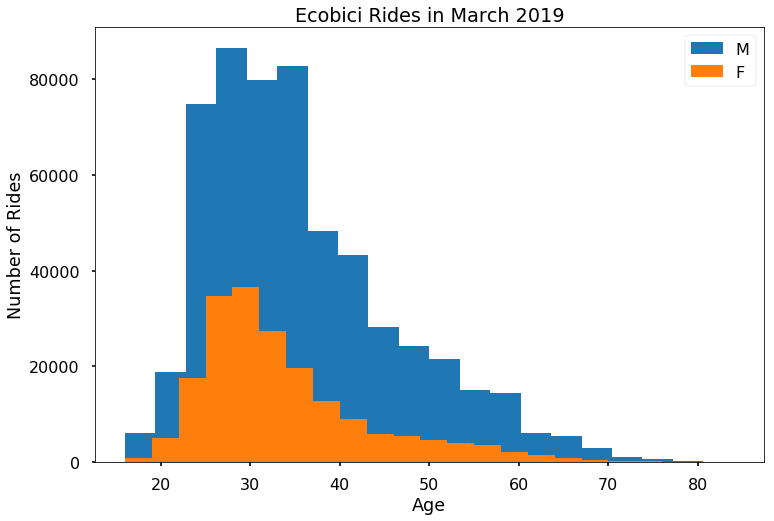

In [38]:
plt.clf()
plt.figure(figsize = (12,8))
plt.hist(df_recent[df_recent["Genero_Usuario"] == "M"]["Edad_Usuario"], bins = 20, label = "M")
plt.hist(df_recent[df_recent["Genero_Usuario"] == "F"]["Edad_Usuario"], bins = 20, label = "F")
plt.title("Ecobici Rides in March 2019")
plt.xlabel("Age")
plt.ylabel("Number of Rides")
plt.legend()
plt.savefig("plots/age_gender.png")

C:\Users\Adam Chang\Anaconda3\envs\ecob\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Adam Chang\Anaconda3\envs\ecob\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


<Figure size 432x288 with 0 Axes>

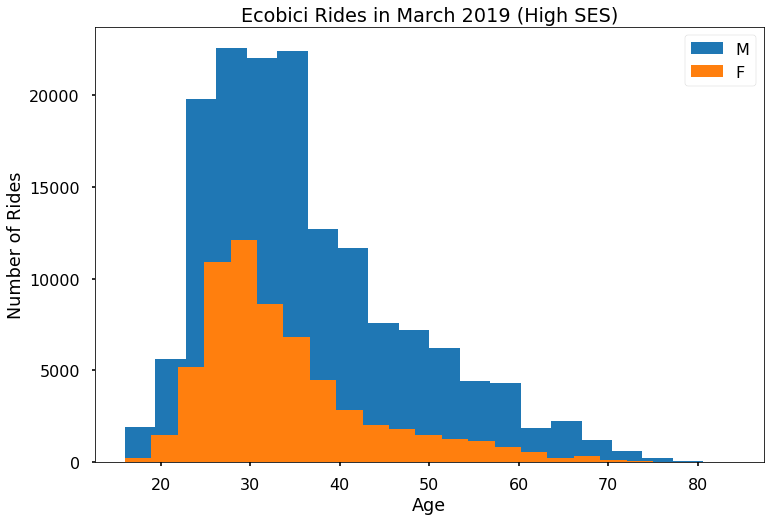

In [192]:
plt.clf()
plt.figure(figsize = (12,8))
plt.hist(df_recent[df_recent["HighSES"]][df_recent["Genero_Usuario"] == "M"]["Edad_Usuario"], bins = 20, label = "M")
plt.hist(df_recent[df_recent["HighSES"]][df_recent["Genero_Usuario"] == "F"]["Edad_Usuario"], bins = 20, label = "F")
plt.title("Ecobici Rides in March 2019 (High SES)")
plt.xlabel("Age")
plt.ylabel("Number of Rides")
plt.legend()
plt.savefig("plots/age_gender_highSES.png")

C:\Users\Adam Chang\Anaconda3\envs\ecob\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Adam Chang\Anaconda3\envs\ecob\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


<Figure size 432x288 with 0 Axes>

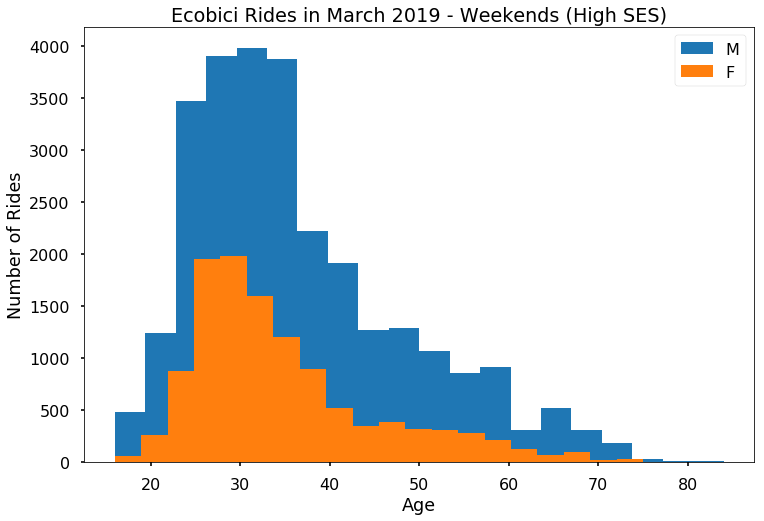

In [191]:
plt.clf()
plt.figure(figsize = (12,8))
plt.hist(df_recent[df_recent["HighSES"]][df_recent["Weekend"]][df_recent["Genero_Usuario"] == "M"]["Edad_Usuario"], bins = 20, label = "M")
plt.hist(df_recent[df_recent["HighSES"]][df_recent["Weekend"]][df_recent["Genero_Usuario"] == "F"]["Edad_Usuario"], bins = 20, label = "F")
plt.title("Ecobici Rides in March 2019 - Weekends (High SES)")
plt.xlabel("Age")
plt.ylabel("Number of Rides")
plt.legend()
plt.savefig("plots/age_gender_weekend_highSES.png")

C:\Users\Adam Chang\Anaconda3\envs\ecob\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Adam Chang\Anaconda3\envs\ecob\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


<Figure size 432x288 with 0 Axes>

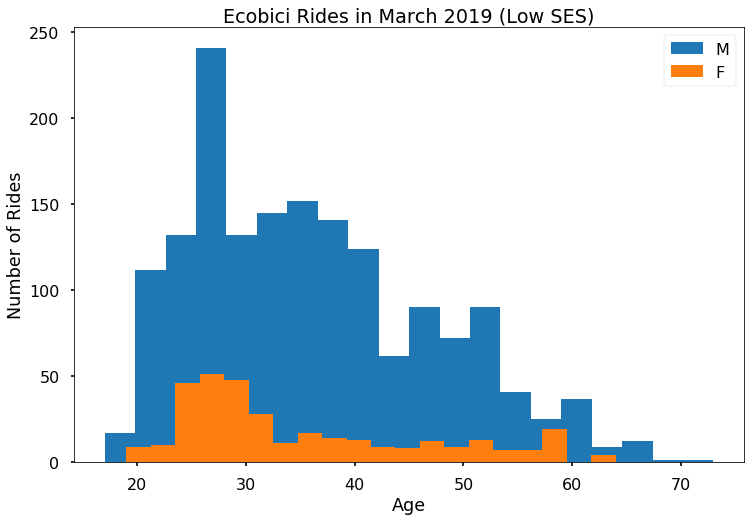

In [193]:
plt.clf()
plt.figure(figsize = (12,8))
plt.hist(df_recent[df_recent["LowSES"]][df_recent["Genero_Usuario"] == "M"]["Edad_Usuario"], bins = 20, label = "M")
plt.hist(df_recent[df_recent["LowSES"]][df_recent["Genero_Usuario"] == "F"]["Edad_Usuario"], bins = 20, label = "F")
plt.title("Ecobici Rides in March 2019 (Low SES)")
plt.xlabel("Age")
plt.ylabel("Number of Rides")
plt.legend()
plt.savefig("plots/age_gender_lowSES.png")

C:\Users\Adam Chang\Anaconda3\envs\ecob\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Adam Chang\Anaconda3\envs\ecob\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


<Figure size 432x288 with 0 Axes>

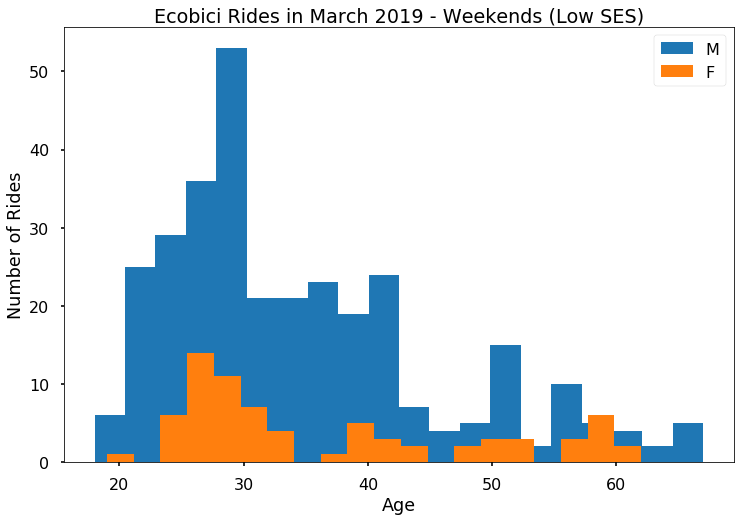

In [194]:
plt.clf()
plt.figure(figsize = (12,8))
plt.hist(df_recent[df_recent["LowSES"]][df_recent["Weekend"]][df_recent["Genero_Usuario"] == "M"]["Edad_Usuario"], bins = 20, label = "M")
plt.hist(df_recent[df_recent["LowSES"]][df_recent["Weekend"]][df_recent["Genero_Usuario"] == "F"]["Edad_Usuario"], bins = 20, label = "F")
plt.title("Ecobici Rides in March 2019 - Weekends (Low SES)")
plt.xlabel("Age")
plt.ylabel("Number of Rides")
plt.legend()
plt.savefig("plots/age_gender_weekend_lowSES.png")